> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: TMDb Movie Data 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this report, I have selected TMDb Movie Data. I am going to answer two questions as the following:
Question 1 Which are genres most popular from year to year?
Question 2 What kinds of properties are associated with movies that have high revenues?
Step 1 Data Wrangling: I will load the data, and understand the data rows and columes.
Step 2 Data Cleaning: I will drop data no need, duplicate and missing values. Also, l will split data in one column that have multiple values per cell.
Step 3 Exploratory Data Analysis: I will answer the two questions according to the charts.
Finally, I will draw a conclusion.

 

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, I will load in the data, check for cleanliness, and then trim and clean my dataset for analysis. 


### General Properties

In [62]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [63]:
df.shape

(10866, 21)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [65]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [66]:
sum(df.duplicated())


1

In [67]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
df_budget_zero = df.query('budget == 0')

In [68]:
df_budget_zero.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00


In [15]:
df_revenue_zero = df.query('revenue== 0')

In [69]:
df_revenue_zero.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.000000e+00,0.0
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0


In [70]:
df_budget_zerocount= df.groupby('budget').count()['id']
df_budget_zerocount.head(2)

budget
0    5696
1       4
Name: id, dtype: int64

In [71]:
df_revenue_zerocount= df.groupby('revenue').count()['id']
df_revenue_zerocount.head(2)

revenue
0    6016
2       2
Name: id, dtype: int64

NOTE: There is lots of information in this dataset and also some data no needs. There is genres column that have multiple strings of information that should be separated out. 
There's no data for profit, I'll will create the column. Also, missing data and duplicate data.



### Data Cleaning

In [73]:
# I'll drop columns that aren't relevant to our analysis such as
#'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date'

In [72]:
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date'], axis=1, inplace=True)
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [ ]:
# There is only 1 duplicate, so I'll drop that row and check the duplicates were removed.

In [74]:
df.drop_duplicates(inplace=True)
sum(df.duplicated())
df.shape

(10865, 14)

In [77]:
df['budget']= df['budget'].replace(0, np.NaN)
df['revenue']= df['revenue'].replace(0, np.NaN)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
id                10865 non-null int64
popularity        10865 non-null float64
budget            5169 non-null float64
revenue           4849 non-null float64
original_title    10865 non-null object
cast              10789 non-null object
director          10821 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(6), int64(4), object(4)
memory usage: 1.2+ MB


In [110]:
# Drop all missing values, There are now 10,731 rows and 14 columns.

In [78]:
df.dropna(inplace=True)
df.isnull().sum().any()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 14 columns):
id                3849 non-null int64
popularity        3849 non-null float64
budget            3849 non-null float64
revenue           3849 non-null float64
original_title    3849 non-null object
cast              3849 non-null object
director          3849 non-null object
runtime           3849 non-null int64
genres            3849 non-null object
vote_count        3849 non-null int64
vote_average      3849 non-null float64
release_year      3849 non-null int64
budget_adj        3849 non-null float64
revenue_adj       3849 non-null float64
dtypes: float64(6), int64(4), object(4)
memory usage: 451.1+ KB


In [109]:
# Create profit column

In [79]:
df['profit'] = df['revenue'] - df['budget']
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,2.284364e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08,1.852382e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09,1.868178e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09,1.316249e+09


In [111]:
# I splitted data in genres column that have multiple values per cell.

In [80]:
df['genres'].str.contains('|')
df['genres'].nunique()

1051

In [81]:
df_genres_split = df.copy()
genres_split = df_genres_split['genres'].str.split('|').apply(pd.Series, 1).stack().reset_index(level=1, drop=True)
genres_split.name = 'genre_split'
df_genres_split = df_genres_split.drop(['genres'], axis=1).join(genres_split)
df_genres_split['genre_split'].unique()


array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'Foreign', 'TV Movie'], dtype=object)

In [113]:
# Here data after split the genres column with 26,753 rows and 15 columns.

In [82]:
df_genres_split.info()
df_genres_split.shape
sum(df_genres_split.duplicated())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10290 entries, 0 to 10848
Data columns (total 15 columns):
id                10290 non-null int64
popularity        10290 non-null float64
budget            10290 non-null float64
revenue           10290 non-null float64
original_title    10290 non-null object
cast              10290 non-null object
director          10290 non-null object
runtime           10290 non-null int64
vote_count        10290 non-null int64
vote_average      10290 non-null float64
release_year      10290 non-null int64
budget_adj        10290 non-null float64
revenue_adj       10290 non-null float64
profit            10290 non-null float64
genre_split       10290 non-null object
dtypes: float64(7), int64(4), object(4)
memory usage: 1.3+ MB


0

In [114]:
# There is no missing data after split.

In [83]:
df_genres_split.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
profit            0
genre_split       0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

Now after I have trimmed and cleaned my data, I am ready to do exploration. Compute statistics and create visualizations with the goal of addressing the research questions that I posed in the Introduction section. 


### Research Question 1 Which are genres most popular from year to year?

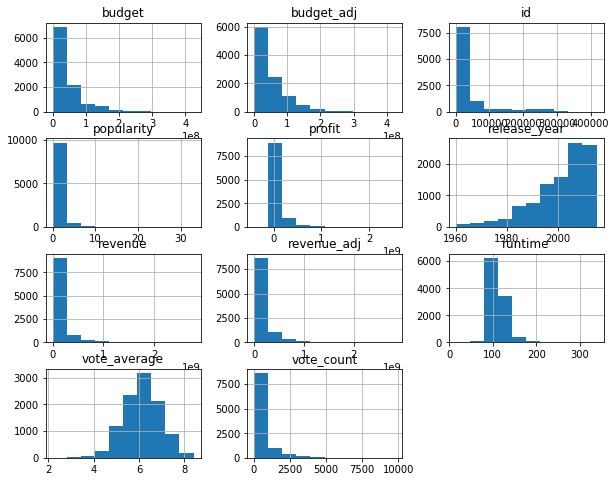

In [84]:
df_genres_split.hist(figsize=(10,8));

In [85]:
df_genres_split.genre_split.value_counts()

Drama              1753
Comedy             1357
Thriller           1203
Action             1085
Adventure           749
Romance             666
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               134
History             129
War                 119
Western              52
Documentary          31
Foreign              12
TV Movie              1
Name: genre_split, dtype: int64

In [86]:
df_genres_split.genre_split.describe()

count     10290
unique       20
top       Drama
freq       1753
Name: genre_split, dtype: object

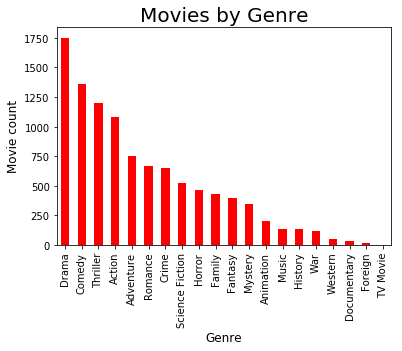

In [87]:
df_genres_split['genre_split'].value_counts().plot(kind='bar', color='r');
plt.title('Movies by Genre', size=20)
plt.xlabel('Genre', size=12)
plt.ylabel('Movie count', size=12);

In [88]:
# The most popular genres in general:
# Drama              1753
#Comedy             1357
#Thriller           1203
#Action             1085  
             

### Research Question 2  What kinds of properties are associated with movies that have high revenues?

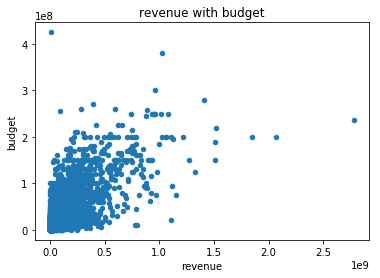

In [89]:
df.plot(x='revenue', y='budget' , kind='scatter', title='revenue with budget');

In [60]:
# NOTE: Revenue and budget have a good positive correlation when the budget is high, the revenue is high.

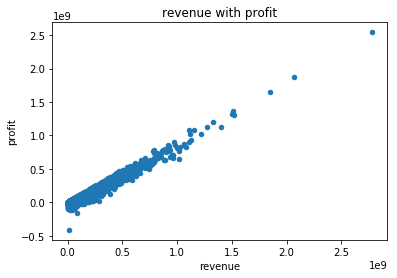

In [90]:
df.plot(x='revenue', y='profit', kind='scatter', title='revenue with profit');

In [52]:
# NOTE: Revenue and profit have a strong positive correlation when the profit is high, the revenue is high. 

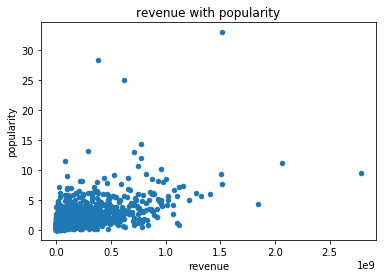

In [91]:
df.plot(x='revenue', y='popularity', kind='scatter', title='revenue with popularity');

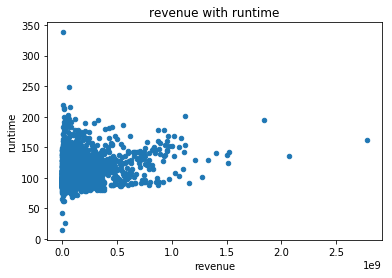

In [92]:
df.plot(x='revenue', y='runtime', kind='scatter', title='revenue with runtime');

In [54]:
# NOTE: Also, when the runtime is short, the revenue is high.

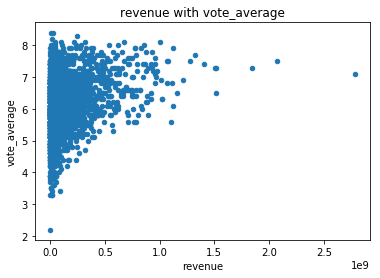

In [93]:
df.plot(x='revenue', y='vote_average', kind='scatter', title='revenue with vote_average' );

In [59]:
# NOTE: Also, when the vote avrege is high, the revenue is high.

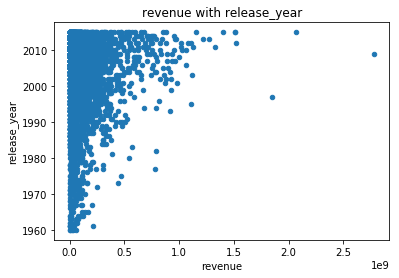

In [94]:
df.plot(x='revenue', y='release_year', kind='scatter', title='revenue with release_year');

In [58]:
# NOTE: Also,the year 2009 was the year where movies made the highest revenue.

<a id='conclusions'></a>
## Conclusions

Finally, the summary of my findings and the results that have been performed. 

# Research Question 1 Which are genres most popular from year to year?
The most popular genres in general:
Drama              4746,  
Comedy             3775, 
Thriller           2902, 
Action             2376.

# Research Question 2 What kinds of properties are associated with movies that have high revenues?
1- Revenue and profit have a strong positive correlation when the profit is high, the revenue is high. 
2- Also, when the runtime is short, the revenue is high.
3- Also, when the vote avrege is high, the revenue is high.

##  Limitations:

This dataset is very huge in information. Some limitations in the dataset as the following: 
The revenue and budget contains and zero values .These zero values are preventing the analysis and have to be removed. Then replace it with null values. However, zero and null values create false results during the correlation plots.



In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])